# **[OK]**

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['name', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [4]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [5]:
model = Sequential()
model.add(Embedding(input_dim=27, output_dim=64, input_length=29))
model.add(LSTM(units=64))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


2023-04-24 02:49:04.492032: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15606/15606 [==============================] - 290s 18ms/step - loss: 0.2299 - accuracy: 0.9013 - val_loss: 0.2369 - val_accuracy: 0.9023
Epoch 2/10
15606/15606 [==============================] - 267s 17ms/step - loss: 0.1347 - accuracy: 0.9478 - val_loss: 0.2030 - val_accuracy: 0.9151
Epoch 3/10
15606/15606 [==============================] - 252s 16ms/step - loss: 0.1178 - accuracy: 0.9546 - val_loss: 0.1867 - val_accuracy: 0.9241
Epoch 4/10
15606/15606 [==============================] - 257s 16ms/step - loss: 0.1090 - accuracy: 0.9580 - val_loss: 0.1871 - val_accuracy: 0.9241
Epoch 5/10
15606/15606 [==============================] - 254s 16ms/step - loss: 0.1033 - accuracy: 0.9603 - val_loss: 0.1739 - val_accuracy: 0.9298
Epoch 6/10
15606/15606 [==============================] - 257s 16ms/step - loss: 0.0988 - accuracy: 0.9622 - val_loss: 0.1705 - val_accuracy: 0.9320
Epoch 7/10
15606/15606 [==============================] - 255s 16ms/step - loss: 0.0955 - accuracy: 0.9636 - val_loss

In [7]:
model.save('../../models/gender-lstm-base.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1728      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 51,649
Trainable params: 51,649
Non-trainable params: 0
_________________________________________________________________


In [11]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 71s 7ms/step - loss: 0.1010 - accuracy: 0.9612

ACCURACY: 0.9612137079238892
LOSS: 0.10103032737970352


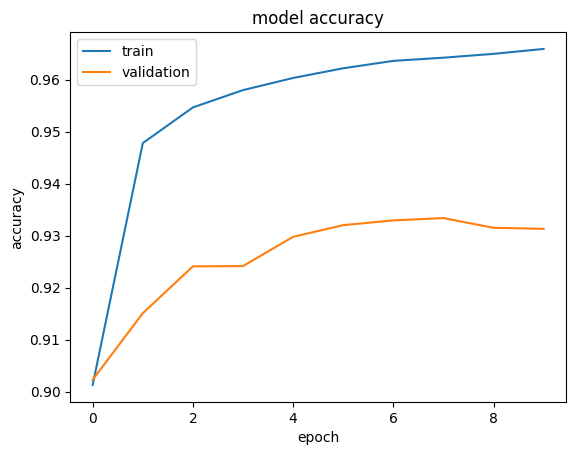

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

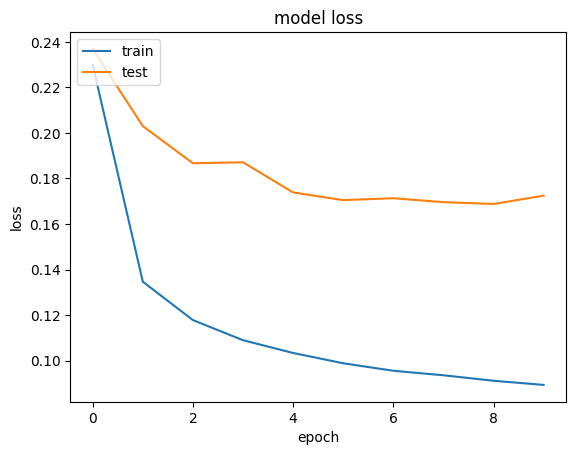

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 98s 5ms/step
Accuracy: 96.12%


In [15]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.95837   0.96694   0.96263    322538
           1    0.96431   0.95509   0.95968    301703

    accuracy                        0.96121    624241
   macro avg    0.96134   0.96102   0.96116    624241
weighted avg    0.96124   0.96121   0.96121    624241



In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-lstm-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik'
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-24 05:50:41.289242: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 261ms/step
Novi Gustiana = Female
1/1 [==============================] - 0s 17ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 17ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 15ms/step
Padli Nofrizal = Male
1/1 [==============================] - 0s 15ms/step
Putri Wahyuni = Female
1/1 [==============================] - 0s 15ms/step
Rahmat Hidayat = Male
1/1 [==============================] - 0s 16ms/step
Rahmi Andreni = Female
1/1 [==============================] - 0s 16ms/step
Rian Aries Fani = Male
1/1 [==============================] - 0s 16ms/step
Riandi Selvi = Female
1/1 [==============================] - 0s 15ms/step
Rianto = Male
1/1 [==============================] - 0s 16ms/step
Ridha Ulva = Female
1/1 [==============================] - 0s 15ms/step
Rizqi Wahyuningsih = Female
1/1 [==============================] - 0s 16ms/step
Ruwadi Saputra = Male
1/1 [=========================